<a href="https://colab.research.google.com/github/yuzhenglim/AI_APP_SVM/blob/main/AI_APP_Assignment_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir Images

In [ ]:
%cd Images


/content/Images


In [ ]:
!pip install -q jmd_imagescraper

In [ ]:
from pathlib import Path
root = Path().cwd()

from jmd_imagescraper.core import * # dont't worry, it's designed to work with import *

duckduckgo_search(root, "Desktop Monitors", "Computer Monitors", max_results=200)
duckduckgo_search(root, "Modem", "modems", max_results=200)
duckduckgo_search(root, "Printer", "printers", max_results=200)
duckduckgo_search(root, "Router", "routers", max_results=200)
duckduckgo_search(root, "Desktop", "desktops", max_results=200)
duckduckgo_search(root, "Laptops", "laptops", max_results=200)
duckduckgo_search(root, "Tablets", "tablet computers", max_results=200)

Duckduckgo search: Computer Monitors


Duckduckgo search: modems


Duckduckgo search: printers


Duckduckgo search: routers


Duckduckgo search: desktops


Duckduckgo search: laptops


Duckduckgo search: tablet computers


[PosixPath('/content/Images/Tablets/001_5995b6ba.jpg'),
 PosixPath('/content/Images/Tablets/002_ab6d4b7a.jpg'),
 PosixPath('/content/Images/Tablets/003_5f4ed33f.jpg'),
 PosixPath('/content/Images/Tablets/004_0e88ea6e.jpg'),
 PosixPath('/content/Images/Tablets/005_fc1ef8ae.jpg'),
 PosixPath('/content/Images/Tablets/006_e2b64e60.jpg'),
 PosixPath('/content/Images/Tablets/007_78be9dcf.jpg'),
 PosixPath('/content/Images/Tablets/008_fb8792d1.jpg'),
 PosixPath('/content/Images/Tablets/009_e5f7b043.jpg'),
 PosixPath('/content/Images/Tablets/010_899898b4.jpg'),
 PosixPath('/content/Images/Tablets/011_b14bd26e.jpg'),
 PosixPath('/content/Images/Tablets/012_3ceb9ace.jpg'),
 PosixPath('/content/Images/Tablets/013_3a191291.jpg'),
 PosixPath('/content/Images/Tablets/014_43d927db.jpg'),
 PosixPath('/content/Images/Tablets/015_939df868.jpg'),
 PosixPath('/content/Images/Tablets/016_a203a198.jpg'),
 PosixPath('/content/Images/Tablets/017_4dd54329.jpg'),
 PosixPath('/content/Images/Tablets/018_7649ab50

In [6]:
!pip install split-folders 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
%cd /content

/content


In [7]:
import os
import splitfolders

splitfolders.ratio('./Images', output="Processed_Data", seed=1337, ratio=(.8, 0.1,0.1)) 

In [1]:
!git clone https://github.com/yuzhenglim/AI_APP_SVM

Cloning into 'AI_APP_SVM'...
remote: Enumerating objects: 1684, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 1684 (delta 2), reused 0 (delta 0), pack-reused 1678
Receiving objects: 100% (1684/1684), 173.93 MiB | 29.03 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Checking out files: 100% (2817/2817), done.


In [3]:
# importing libraries

import zipfile
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
import keras
import cv2
%matplotlib inline
#import K-Means
from sklearn.cluster import KMeans
# important metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import MiniBatchKMeans

In [9]:
data = []
label = []
# path = "./Processed_Data/train/"  #If running without git clone
path = "./AI_APP_SVM/Processed_Data/train/" #Running with git clone
d = 0
dm = 0
l = 0
m = 0
p = 0
r = 0
t = 0
IMG_SIZE = 32
for file in os.listdir(path):
  for img_reading in os.listdir(path+file):
      img=cv2.imread(path+file+'/'+img_reading)
      img=cv2.resize(img,(IMG_SIZE,IMG_SIZE))
      img=img.astype('float32')
      if file =='Desktop':
        d+=1
        label.append("Desktop")
      elif file == 'Desktop Monitors':
        dm+=1
        label.append("Desktop Monitors")
      elif file == 'Laptops':
        l+=1
        label.append("Laptops")
      elif file == 'Modem':
        m+=1
        label.append("Modem")
      elif file == 'Printer':
        p+=1
        label.append("Printer")
      elif file == 'Router':
        r+=1
        label.append("Router")
      elif file == 'Tablets':
        t+=1
        label.append("Tablets")
      data.append(img)
data = np.array(data)

In [ ]:
data_label = []
for i in label:
    if i=="Desktop": data_label.append(0)
    elif i=="Desktop Monitors": data_label.append(1)
    elif i=="Laptops": data_label.append(2)
    elif i=="Modem": data_label.append(3)
    elif i=="Printer": data_label.append(4)
    elif i=="Router": data_label.append(5)
    elif i=="Tablets": data_label.append(6)

data_label = np.array(data_label)

In [ ]:
data = data/255.0
reshaped_data = data.reshape(len(data),-1)
reshaped_data.shape

(1120, 3072)

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0)
clusters = kmeans.fit_predict(reshaped_data)
kmeans.cluster_centers_.shape

(7, 3072)

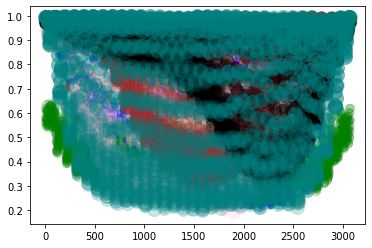

In [ ]:
x_data = [i for i in range(3072)]
plt.scatter(x_data,kmeans.cluster_centers_[0], color = 'red',alpha=0.2,s=10)
plt.scatter(x_data,kmeans.cluster_centers_[1] , color = 'blue',alpha=0.2,s=40)
plt.scatter(x_data,kmeans.cluster_centers_[2] , color = 'green',alpha=0.2,s=70)
plt.scatter(x_data,kmeans.cluster_centers_[3] , color = 'pink',alpha=0.2,s=100)
plt.scatter(x_data,kmeans.cluster_centers_[4] , color = 'brown',alpha=0.2,s=130)
plt.scatter(x_data,kmeans.cluster_centers_[5] , color = 'black',alpha=0.2,s=160)
plt.scatter(x_data,kmeans.cluster_centers_[6] , color = 'teal',alpha=0.2,s=190)

In [ ]:
def get_reference_dict(clusters,data_label):
    reference_label = {}
    # For loop to run through each label of cluster label
    for i in range(len(np.unique(clusters))):
        index = np.where(clusters == i,1,0)
        num = np.bincount(data_label[index==1]).argmax()
        reference_label[i] = num
    return reference_label
# Mapping predictions to original labels
def get_labels(clusters,refernce_labels):
    temp_labels = np.random.rand(len(clusters))
    for i in range(len(clusters)):
        temp_labels[i] = reference_labels[clusters[i]]
    return temp_labels

In [ ]:
reference_labels = get_reference_dict(clusters,data_label)
predicted_labels = get_labels(clusters,reference_labels)
print(accuracy_score(predicted_labels,data_label))

0.3419642857142857


Accuracy for k = 2:  0.2017857142857143
Accuracy for k = 16:  0.4375
Accuracy for k = 64:  0.5160714285714286
Accuracy for k = 100:  0.5455357142857142
Accuracy for k = 256:  0.6544642857142857


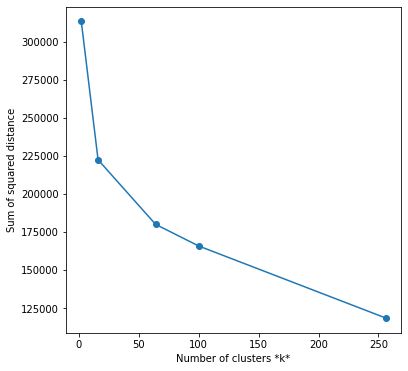

In [ ]:
sse = []
list_k = [2,16,64,100,256]
for k in list_k:
    km = KMeans(n_clusters=k)
    clusters = km.fit_predict(reshaped_data)
    sse.append(km.inertia_)
    reference_labels = get_reference_dict(clusters,data_label)
    predicted_labels = get_labels(clusters,reference_labels)
    print(f"Accuracy for k = {k}: ", accuracy_score(predicted_labels,data_label))
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [ ]:
#CNN, transfer learning
import tensorflow as tf
import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.preprocessing import image

model = ResNet50(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE,3))

def extract_vector(data_holder):

    resnet_feature_list = []

    for im in data_holder:

        im = image.img_to_array(im) 

        img = preprocess_input(np.expand_dims(im.copy(), axis=0))

        resnet_feature = model.predict(img)

        resnet_feature_np = np.array(resnet_feature)

        resnet_feature_list.append(resnet_feature_np.flatten())
        
    return np.array(resnet_feature_list)


94781440/94765736 [==============================] - 1s 0us/step


0.6544642857142857


Text(0.5, 15.0, 'predicted label')

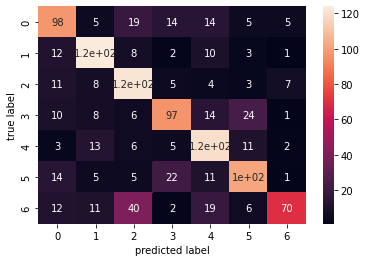

In [ ]:
array = extract_vector(data)
kmeans_resnet = KMeans(n_clusters=7, random_state=0)
clusters = kmeans_resnet.fit_predict(array)
print(accuracy_score(predicted_labels,data_label))
mat = confusion_matrix(data_label,predicted_labels )
sns.heatmap(mat, annot=True)
plt.ylabel('true label')
plt.xlabel('predicted label')

In [ ]:
centroids = kmeans_resnet.cluster_centers_
centroids.shape


(7, 2048)

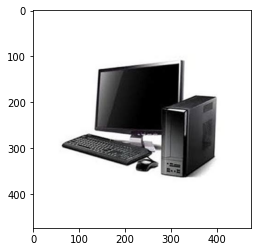

In [ ]:
image = plt.imread('/content/Processed_Data/train/Desktop/036_f41e109f.jpg')
plt.imshow(image)

In [ ]:
image.shape

(474, 474, 3)

In [ ]:
image = cv2.resize(img,(32,32))
image = image.reshape(1,3072)
image.shape
# test_data = [image]

(1, 3072)

In [ ]:
reference_labels = get_reference_dict(kmeans.labels_,data_label)
number_labels = np.random.rand(len(kmeans.labels_))
for i in range(len(kmeans.labels_)):
  number_labels[i] = reference_labels[kmeans.labels_[i]]

In [ ]:
predicted_cluster = kmeans.predict(image)

In [ ]:
number_labels[[predicted_cluster]]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


array([2.])